### Single_tel model

- Metric optimized: AUC

- Model optimized: single_tel

- Iterations performed: 100 (MSTN, MSTF, LST), 50 (SSTC)
 
- Space of hyperparameters to optimize: 
    - number of filters layer 1: [16, 64] 
    - number of filters layer 2: [16, 128]
    - number of filters layer 3: [16, 256]
    - number of filters layer 4: [16, 512]
    - kernel size layer 1: [2,10] 
    - kernel size layer 2: [2,10] 
    - kernel size layer 3: [2,10] 
    - kernel size layer 4: [2,10].


#### Results:

|Hyperparameters |Telescope Type | Validation Accuracy | Validation AUC | Training Time|
|---|---|---|---|---|
|Base|LST|70.38%|0.7887|0h 41m 22s|
|Optimized|LST|72.45%|0.8150|0h 39m 14s|
|Base|SSTC|73.90%|0.8118|0h 42m 4s|
|Optimized|SSTC|79.87%|0.8830|1h 16m 4s|
|Base|MSTN|78.04%|0.8659|0h 58m 10s|
|Optimized|MSTN|80.11%|0.8929|0h 52m 48s|
|Base|MSTF|74.60%|0.8360|0h 55m 0s|
|Optimized|MSTF|79.01%|0.8816|0h 48m 37s|
    
|Telescope Type | Model  |Filters 1|Filters 2|Filters 3|Filters 4| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|
|---|---|---|---|---|---|---|---|---|---|
|LST|Base|32|32|64|128| 3| 3 |3 | 3|
|LST|Optimized|44|32|237|80|8|6|7|6|
	
|Telescope Type | Model  |Filters 1|Filters 2|Filters 3| Kernel size 1 | Kernel size 2 | Kernel size 3|
|---|---|---|---|---|---|---|---|
|SSTC|Base|32|64|128| 3| 3 |3 | 
|SSTC|Optimized|63|126|90|9|6|10|

|Telescope Type | Model  |Filters 1|Filters 2|Filters 3|Filters 4| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|
|---|---|---|---|---|---|---|---|---|---|
|MSTN|Base|32|32|64|128| 3| 3 |3 | 3|
|MSTN|Optimized|58|109|183|315|5|8|8|4|

|Telescope Type | Model  |Filters 1|Filters 2|Filters 3|Filters 4| Kernel size 1 | Kernel size 2 | Kernel size 3|Kernel size 4|
|---|---|---|---|---|---|---|---|---|---|
|MSTF|Base|32|32|64|128| 3| 3 |3 | 3|
|MSTF|Optimized|42|90|138|278|9|5|9|7|


|Telescope Type |Metric |Improvement |
|---|---|---|
|LST|Validation Accuracy |2.07%|
|LST|Validation AUC| 2.63%|
|SSTC|Validation Accuracy |5.97%|
|SSTC|Validation AUC| 7.12%|
|MSTN|Validation Accuracy |2.07%|
|MSTN|Validation AUC| 2.70%|
|MSTF|Validation Accuracy |4.41%|
|MSTF|Validation AUC| 4.56%|



### Cnn_rnn model (outdated)

Metric scores obtained using the best set of hyperparameters got for single_tel model and comparison with base models:

|Hyperparameters |Telescope Type | Validation Accuracy | Validation AUC | Training Time|
|---|---|---|---|---|
|Base|LST|73.43%|0.8285|0h 41m 22s|
|Optimized|LST|74.96%|0.8422|0h 46m 53s|
|Base|SSTC|80.64%|0.9072|1h 51m 5s|
|Optimized|SSTC|83.49%|0.9217|3h 31m 43s|
|Base|MSTN|83.10%|0.9169|2h 15m 52s|
|Optimized|MSTN|84.20%|0.9313|6h 43m 14s|

|Telescope Type |Metric |Improvement |
|---|---|---|
|LST|Validation Accuracy |1.53%|
|LST|Validation AUC| 1.37%|
|SSTC|Validation Accuracy |2.85%|
|SSTC|Validation AUC| 1.45%|
|MSTN|Validation Accuracy |1.10%|
|MSTN|Validation AUC| 1.44%|

In [1]:
import pandas as pd
import pylab as plt
import matplotlib.pyplot as plt
from neptunecontrib.hpo.utils import df2result
from skopt.plots import plot_evaluations

sstc = pd.read_csv('sstc.csv')
lst = pd.read_csv('lst.csv')
mstn = pd.read_csv('mstn.csv')
mstf = pd.read_csv('mstf.csv')


mstn_result = df2result(mstn, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
mstf_result = df2result(mstf, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
lst_result = df2result(lst, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel', 'layer4_filters', 'layer4_kernel'])
sstc_result = df2result(sstc, 
                       metric_col = 'auc_val', 
                       param_cols = ['layer1_filters', 'layer1_kernel', 'layer2_filters', 'layer2_kernel',
                                    'layer3_filters', 'layer3_kernel'])

In [14]:
sstc_sorted = sstc.sort_values('auc_val', ascending = False)
sstc_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
0,1,0.116962,63.0,9.0,126.0,6.0,90.0,10.0,0.883038,0.798675,0.804210,0.793168,0.863397,4602.025567
52,53,0.118069,29.0,6.0,121.0,7.0,223.0,10.0,0.881931,0.798950,0.800763,0.797146,0.874970,4234.565997
27,28,0.118357,49.0,4.0,94.0,8.0,151.0,7.0,0.881643,0.797598,0.817676,0.777620,0.867597,4768.971889
44,45,0.118371,54.0,5.0,100.0,9.0,71.0,9.0,0.881629,0.798102,0.801177,0.795043,0.865942,4979.190280
33,34,0.119614,43.0,8.0,103.0,7.0,228.0,9.0,0.880386,0.797231,0.796489,0.797970,0.880891,4584.863184
36,37,0.119925,43.0,6.0,100.0,8.0,170.0,10.0,0.880075,0.796314,0.773141,0.819371,0.875901,4628.175195
32,33,0.119964,48.0,10.0,91.0,5.0,152.0,10.0,0.880036,0.795237,0.793225,0.797238,0.876897,4465.680178
54,55,0.120810,28.0,9.0,108.0,7.0,239.0,9.0,0.879190,0.796177,0.802142,0.790241,0.879915,5147.557933
25,26,0.121006,51.0,4.0,117.0,9.0,155.0,5.0,0.878994,0.793655,0.834773,0.752744,0.897919,4831.250988
39,40,0.121019,61.0,7.0,78.0,7.0,76.0,7.0,0.878981,0.795626,0.794145,0.797101,0.875864,4441.789420


In [2]:
mstn_sorted = mstn.sort_values('auc_val', ascending = False)
mstn_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
83,84,0.107111,58,5,109,8,183,8,315,4,0.892889,0.801051,0.858612,0.747094,0.821363,3167.990778
82,83,0.107507,59,6,124,7,189,10,207,4,0.892493,0.797940,0.868293,0.731991,0.827550,3159.622981
71,72,0.107807,62,6,94,6,204,10,130,4,0.892193,0.802589,0.827305,0.779421,0.819639,3043.263056
63,64,0.108042,49,5,109,5,204,6,414,4,0.891958,0.802729,0.824535,0.782288,0.819942,6947.555477
33,34,0.108045,44,10,120,6,194,10,133,10,0.891955,0.802461,0.792506,0.811793,0.825479,5820.490232
96,97,0.108167,61,6,76,7,197,7,252,4,0.891833,0.802496,0.814661,0.791092,0.821688,3053.249457
53,54,0.108297,50,8,86,6,234,9,186,5,0.891703,0.801925,0.818274,0.786600,0.821696,5546.827348
85,86,0.108307,57,6,99,10,144,10,236,5,0.891693,0.800771,0.846908,0.757523,0.823168,3306.023628
75,76,0.108362,54,4,111,4,146,10,473,4,0.891638,0.803218,0.817985,0.789376,0.821627,3045.882030
87,88,0.108501,60,5,122,9,219,10,295,5,0.891499,0.801750,0.834481,0.771068,0.821353,4626.238879


In [3]:
mstf_sorted = mstf.sort_values('auc_val', ascending = False)
mstf_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
66,67,0.118414,42,9,90,5,138,9,278,7,0.881586,0.790145,0.839650,0.743907,0.855487,2916.837474
51,52,0.118464,35,7,76,5,198,10,315,7,0.881536,0.790766,0.831287,0.752919,0.860168,2884.944810
26,27,0.118757,45,8,104,6,213,8,199,7,0.881243,0.789915,0.832210,0.750411,0.859208,2951.334273
76,77,0.118986,47,8,95,5,215,7,295,9,0.881014,0.792360,0.814141,0.772016,0.856409,2940.503537
39,40,0.119162,46,10,109,5,105,9,329,8,0.880838,0.790347,0.815932,0.766452,0.857658,2905.164812
65,66,0.119178,50,8,110,5,124,9,317,8,0.880822,0.790550,0.798534,0.783093,0.857178,2907.952438
58,59,0.119211,34,6,83,6,241,6,355,7,0.880789,0.789064,0.811932,0.767706,0.857315,2944.799723
86,87,0.119240,41,6,100,7,167,9,174,10,0.880760,0.791104,0.804044,0.779017,0.864286,2882.635114
55,56,0.119245,40,3,78,4,210,10,280,7,0.880755,0.790118,0.815372,0.766530,0.857579,2881.930711
71,72,0.119317,56,8,106,5,150,10,115,7,0.880683,0.790415,0.826308,0.756890,0.861142,2904.889300


In [4]:
lst_sorted = lst.sort_values('auc_val', ascending = False)
lst_sorted.head(10)

,iteration,loss,layer1_filters,layer1_kernel,layer2_filters,layer2_kernel,layer3_filters,layer3_kernel,layer4_filters,layer4_kernel,auc_val,acc_val,acc_gamma_val,acc_proton_val,loss_val,run_time
81,82,0.184965,44,8,32,6,236,7,80,6,0.815035,0.724499,0.701407,0.747447,1.046659,2353.938785
65,66,0.185874,52,10,29,5,193,6,142,5,0.814126,0.720156,0.818253,0.622669,1.059532,2385.095205
30,31,0.186411,35,6,26,6,184,7,90,8,0.813589,0.724221,0.753686,0.694938,1.054876,3986.580065
68,69,0.187085,54,10,35,7,153,6,113,5,0.812915,0.722828,0.704312,0.741230,1.041170,2309.123246
66,67,0.187158,52,10,30,6,185,6,58,5,0.812842,0.720100,0.703642,0.736456,1.044190,2365.758958
69,70,0.187179,56,9,34,7,140,5,147,4,0.812821,0.725056,0.776251,0.674179,1.045337,2328.633619
59,60,0.187616,40,8,48,6,218,7,17,6,0.812384,0.722494,0.736595,0.708481,1.045059,2370.670102
78,79,0.188331,54,10,53,4,151,7,163,5,0.811669,0.721436,0.789097,0.654196,1.066242,2345.461425
88,89,0.188854,45,8,62,6,215,5,123,6,0.811146,0.722105,0.763740,0.680728,1.071863,2364.915562
4,5,0.188932,47,9,18,4,192,5,204,5,0.811068,0.718263,0.808311,0.628774,1.059673,4008.148126


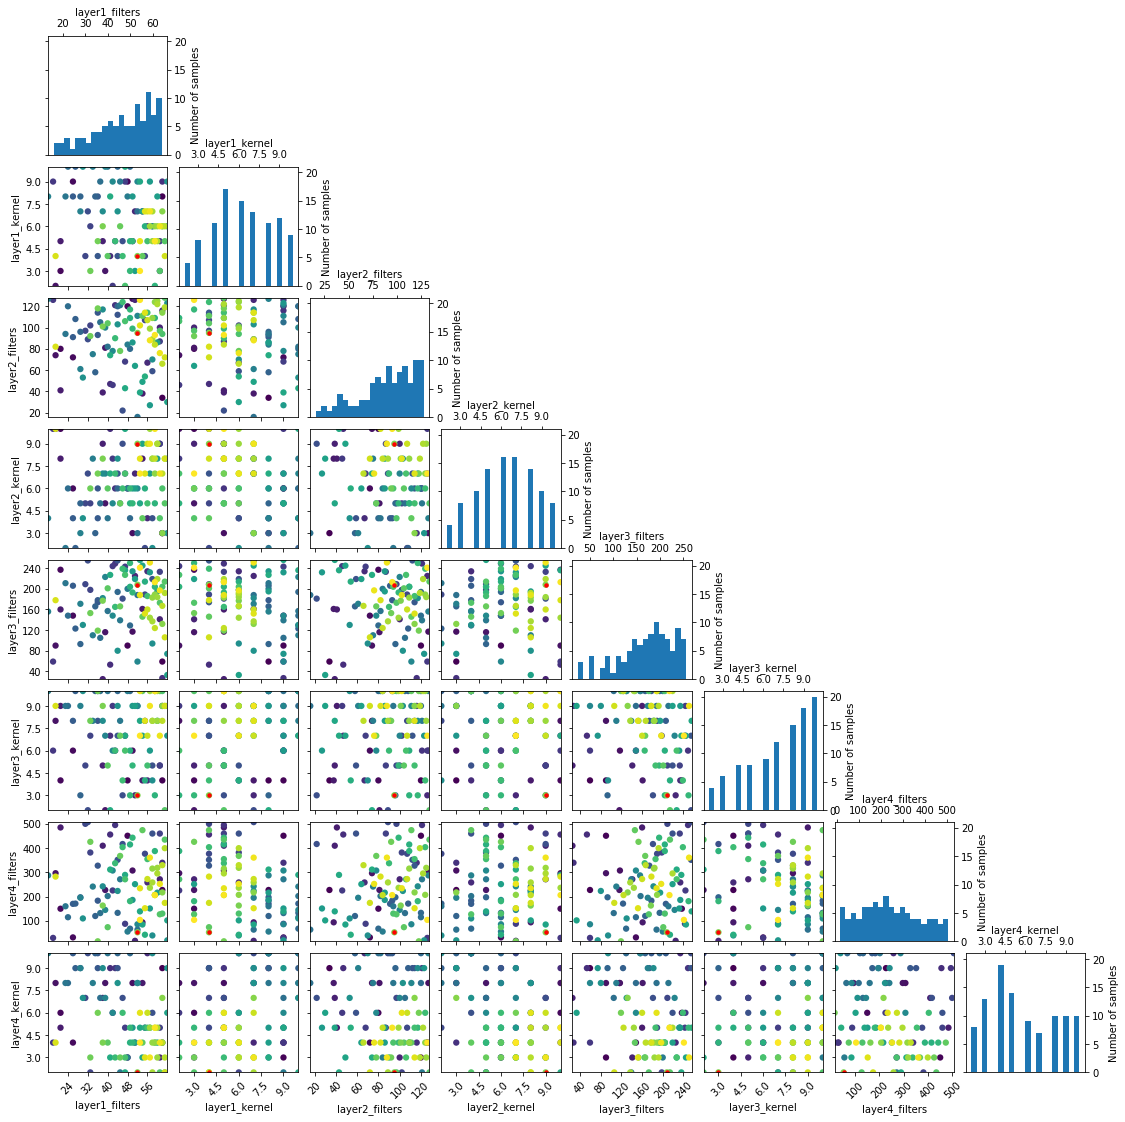

In [8]:
#NectarCam
plot_evaluations(mstn_result)
plt.show()

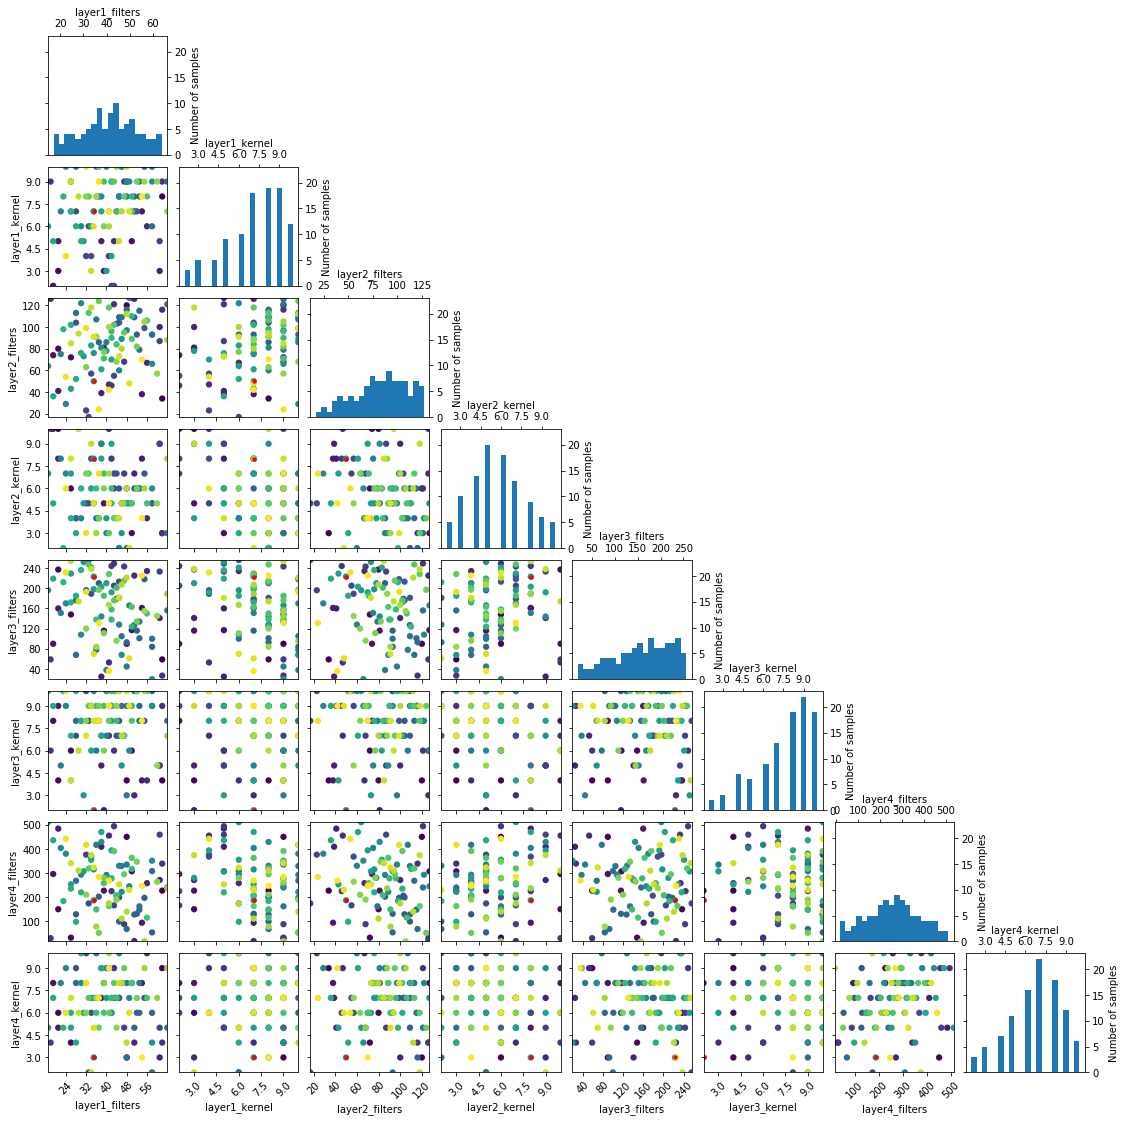

In [17]:
#FlashCam
plot_evaluations(mstf_result)
plt.show()

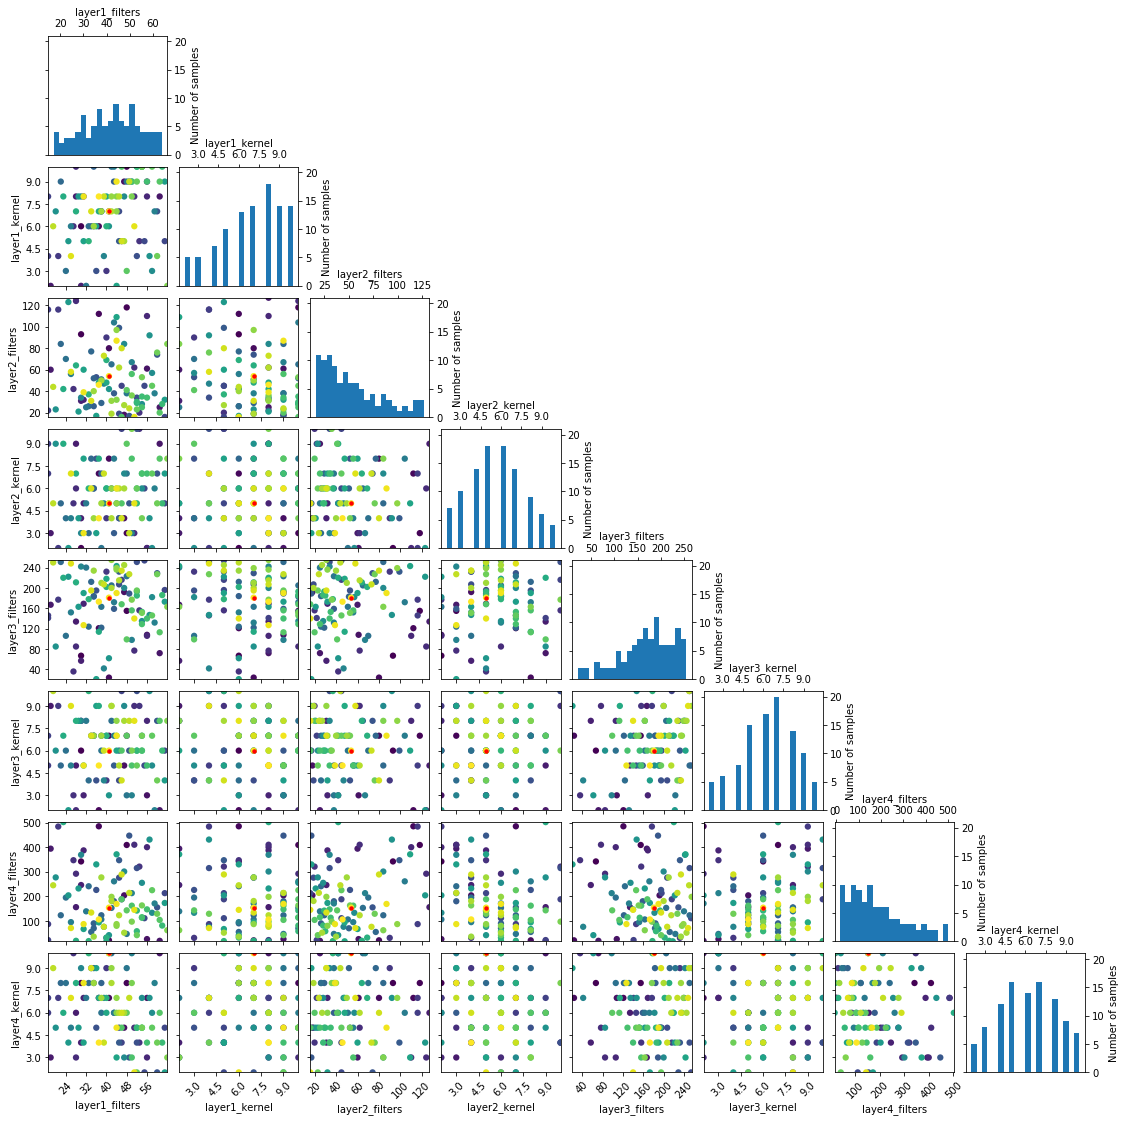

In [19]:
#LSTCam
plot_evaluations(lst_result)
plt.show()

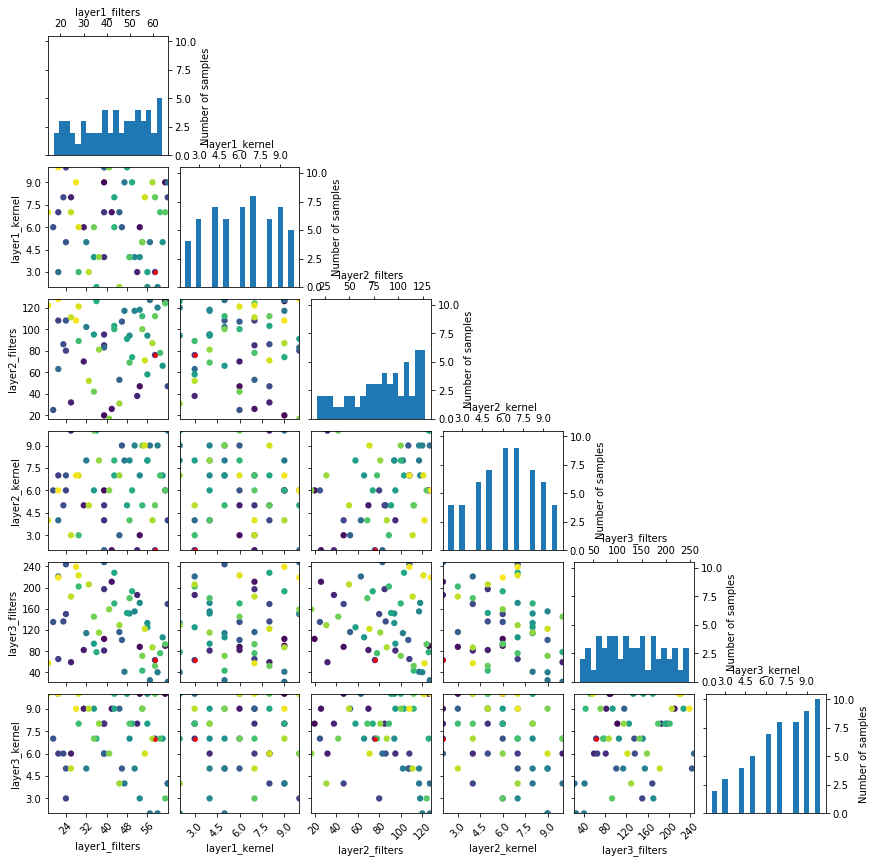

In [20]:
#Chec
plot_evaluations(sstc_result)
plt.show()

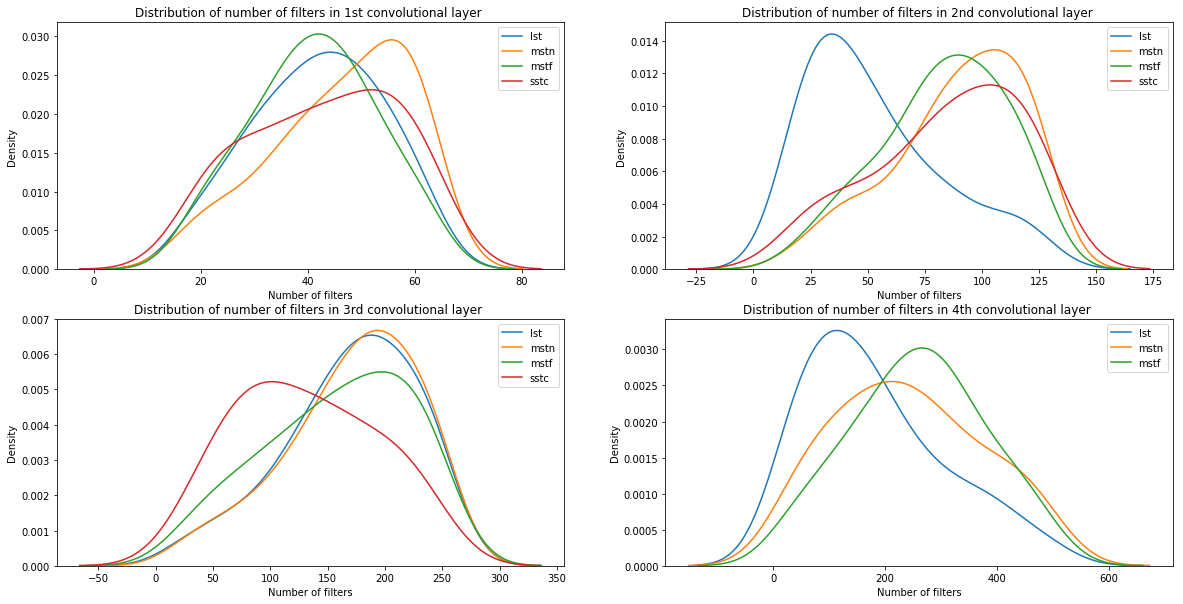

In [23]:
import seaborn as sns

plt.figure(figsize = (20, 10))
ordinals = ['st','nd','rd','th']

for n in range (4):

    plt.subplot(2,2,n+1)
    sns.distplot(lst['layer{}_filters'.format(n+1)], hist = False, label = 'lst')
    sns.distplot(mstn['layer{}_filters'.format(n+1)], hist = False, label = 'mstn')
    sns.distplot(mstf['layer{}_filters'.format(n+1)], hist = False, label = 'mstf')
    
    if n < 3:
        sns.distplot(sstc['layer{}_filters'.format(n+1)], hist = False, label = 'sstc')
    plt.xlabel('Number of filters'); plt.ylabel('Density'); plt.title('Distribution of number of filters in {}{} convolutional layer '.format(n+1, ordinals[n])); 



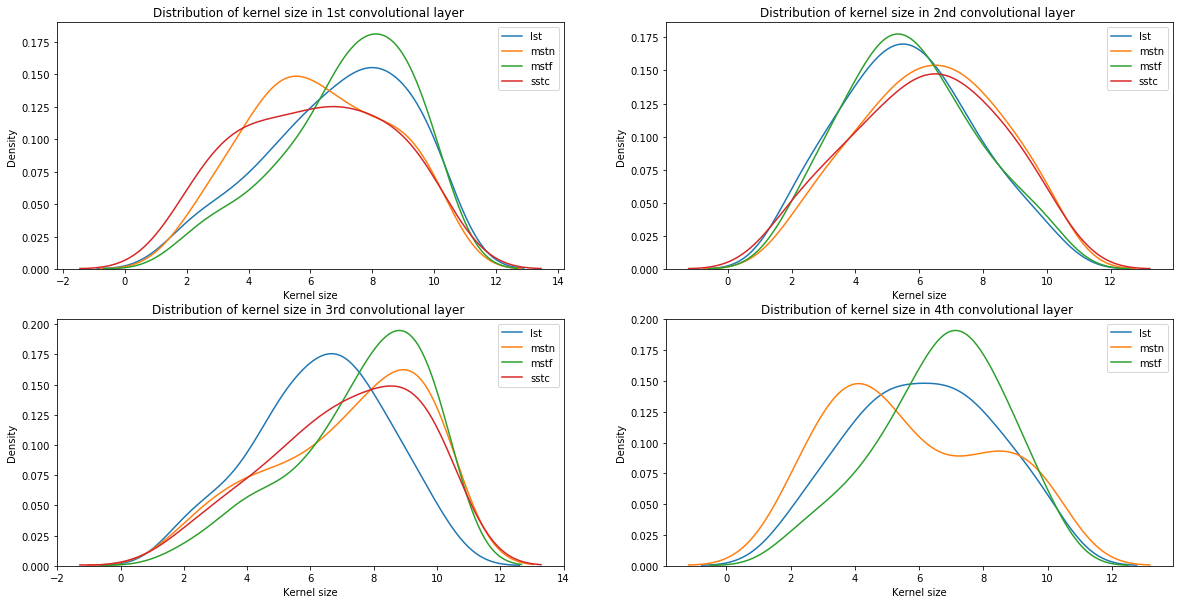

In [57]:
import seaborn as sns

plt.figure(figsize = (20, 10))
ordinals = ['st','nd','rd','th']

for n in range (4):

    plt.subplot(2,2,n+1)
    sns.distplot(lst['layer{}_kernel'.format(n+1)], hist = False, label = 'lst')
    sns.distplot(mstn['layer{}_kernel'.format(n+1)], hist = False, label = 'mstn')
    sns.distplot(mstf['layer{}_kernel'.format(n+1)], hist = False, label = 'mstf')

    if n < 3:
        sns.distplot(sstc['layer{}_kernel'.format(n+1)], hist = False, label = 'sstc')
    plt.xlabel('Kernel size'); plt.ylabel('Density'); plt.title('Distribution of kernel size in {}{} convolutional layer '.format(n+1, ordinals[n])); 

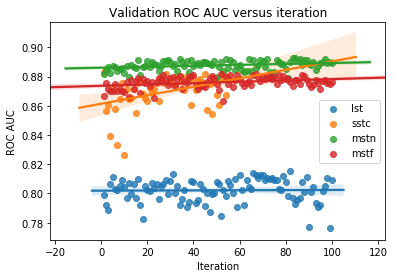

In [33]:
import seaborn as sns
sns.regplot(lst['iteration'], lst['auc_val'], label = 'lst')
sns.regplot(sstc['iteration'], sstc['auc_val'], label = 'sstc')
sns.regplot(mstn['iteration'], mstn['auc_val'], label = 'mstn')
sns.regplot(mstf['iteration'], mstf['auc_val'], label = 'mstf')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");

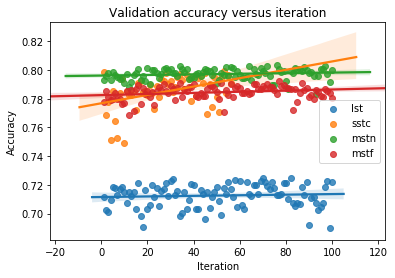

In [34]:
import seaborn as sns
import seaborn as sns
sns.regplot(lst['iteration'], lst['acc_val'], label = 'lst')
sns.regplot(sstc['iteration'], sstc['acc_val'], label = 'sstc')
sns.regplot(mstn['iteration'], mstn['acc_val'], label = 'mstn')
sns.regplot(mstf['iteration'], mstf['acc_val'], label = 'mstf')

plt.xlabel('Iteration');plt.ylabel('ROC AUC' ); plt.title('Validation ROC AUC versus iteration'), plt.legend(loc="best");

plt.xlabel('Iteration');plt.ylabel('Accuracy' ); plt.title('Validation accuracy versus iteration'),plt.legend(loc="best");

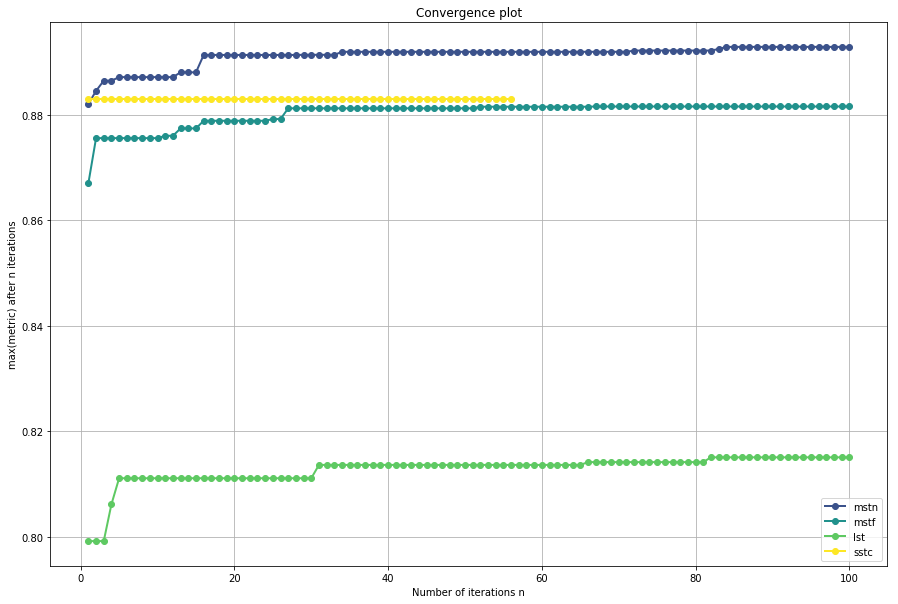

In [2]:
from ctlearn_optimizer import auxiliar_plot_functions as apf
results = [('mstn', mstn_result),('mstf', mstf_result),('lst', lst_result),('sstc', sstc_result)]
plt.figure(figsize=(15,10))
apf.plot_convergence(*results)
plt.show()